In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from keras.callbacks import LearningRateScheduler
from tensorflow.keras import optimizers
import tensorflow as tf
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv("/content/IRIS.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
model = Sequential()

model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))

model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 1s 106ms/step - loss: 5.8115e-08 - accuracy: 0.5125 - val_loss: 6.5565e-08 - val_accuracy: 0.4500
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 5.8115e-08 - accuracy: 0.5125 - val_loss: 6.5565e-08 - val_accuracy: 0.4500
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 5.8115e-08 - accuracy: 0.5125 - val_loss: 6.5565e-08 - val_accuracy: 0.4500
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 5.8115e-08 - accuracy: 0.5125 - val_loss: 6.5565e-08 - val_accuracy: 0.4500
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 5.8115e-08 - accuracy: 0.5125 - val_loss: 6.5565e-08 - val_accuracy: 0.4500
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 5.8115e-08 - accuracy: 0.5125 - val_loss: 6.5565e-08 - val_accuracy: 0.4500
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 5.8115e-08 - accuracy: 0.5125 - val_loss: 6.5565e-0

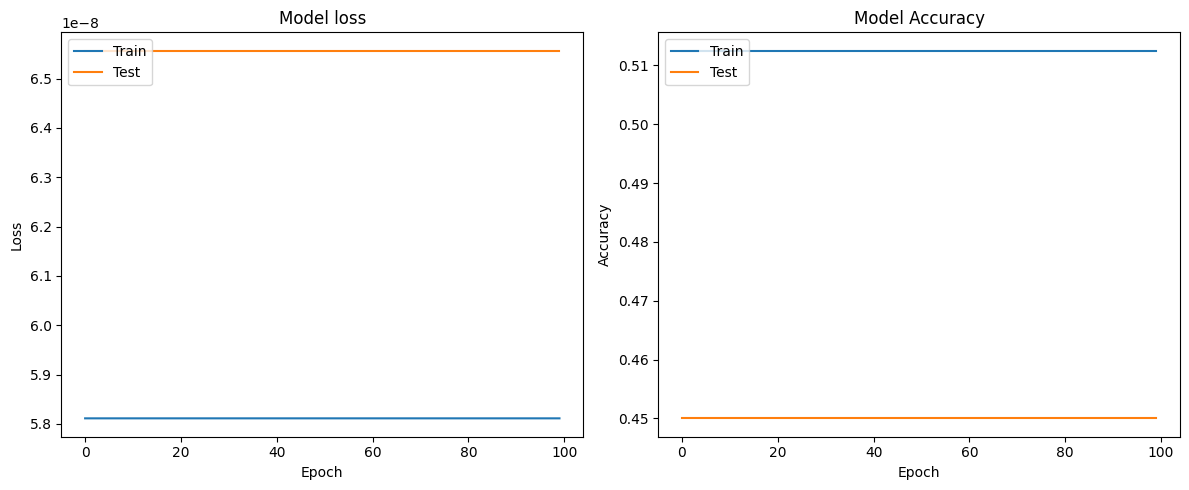

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()